### Movie Dateset Exploratory Analysis
### Skills used: Pandas, Matplotlib, Seaborn, Scatter plot, Correlation Matrix, Data Types
### Dataset used https://www.kaggle.com/datasets/danielgrijalvas/movies/

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
#Option to look at all rows of the dataframe
pd.set_option('display.max_rows', None)

In [3]:
#Import the dataset
df = pd.read_csv('movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Find the missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#Drop the missing values
df = df.dropna()

In [7]:
#Look at data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#Fix the data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
#Assuming that the corrent year date is in the released column, the year is extracted from there to be used in the analysis
#Put None in the cell containing the wrong date format
df['yearcorrect'] = df['released'].apply(lambda x: x.split(',')[1].strip().split()[0] if ',' in x else None)

In [10]:
df = df.dropna()

In [11]:
df['yearcorrect'] = df['yearcorrect'].astype('int64')

In [12]:
#Drop the columns with the wrong year and the full date
df = df.drop(columns=['year', 'released'])

In [13]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [15]:
#Drop duplicates in needed
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                    name     rating      genre   
0                                           The Shining          R      Drama  \
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG

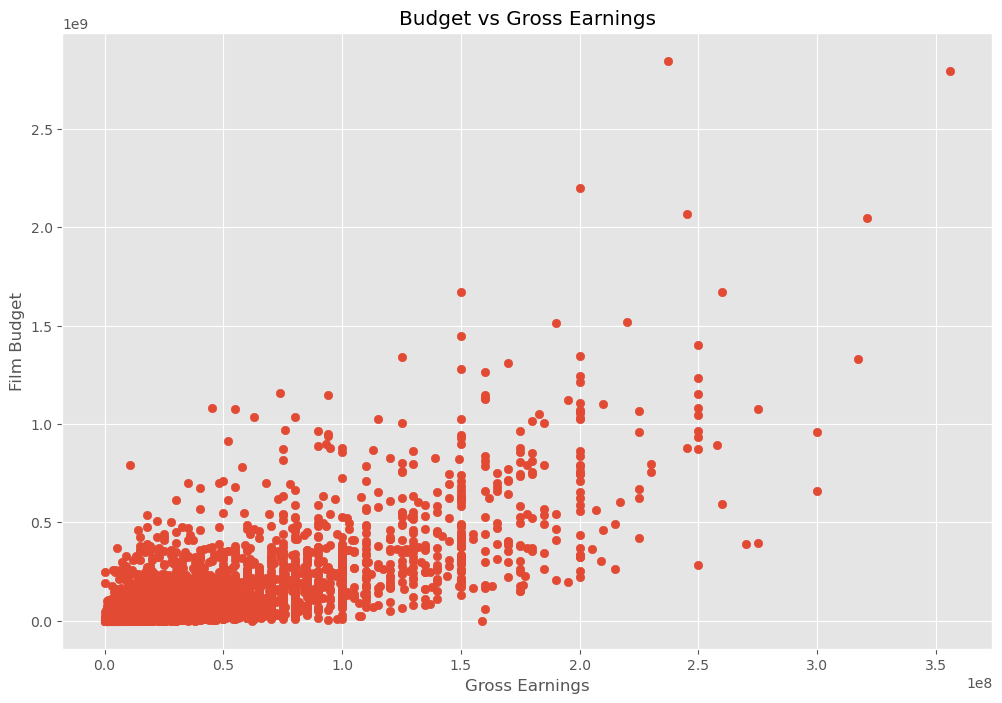

In [16]:
#Create a scatter plot to check correlation
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

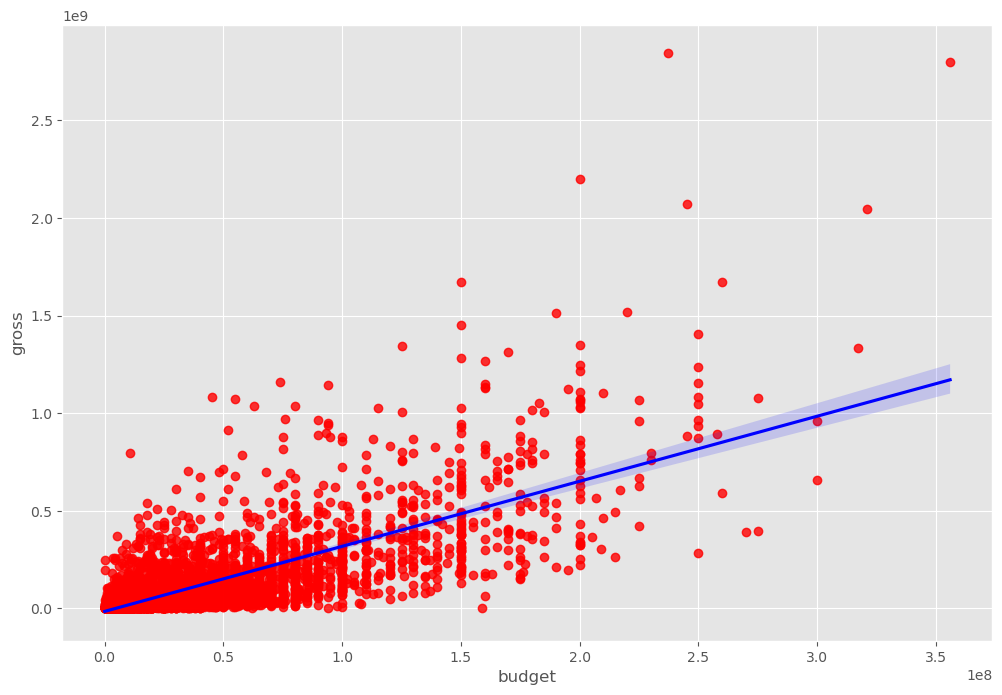

In [17]:
#Create a regression plot to check correlation
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [18]:
#Create a correlation matrix for the numeric features 
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson') #default correlation method
correlation_matrix

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
yearcorrect,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


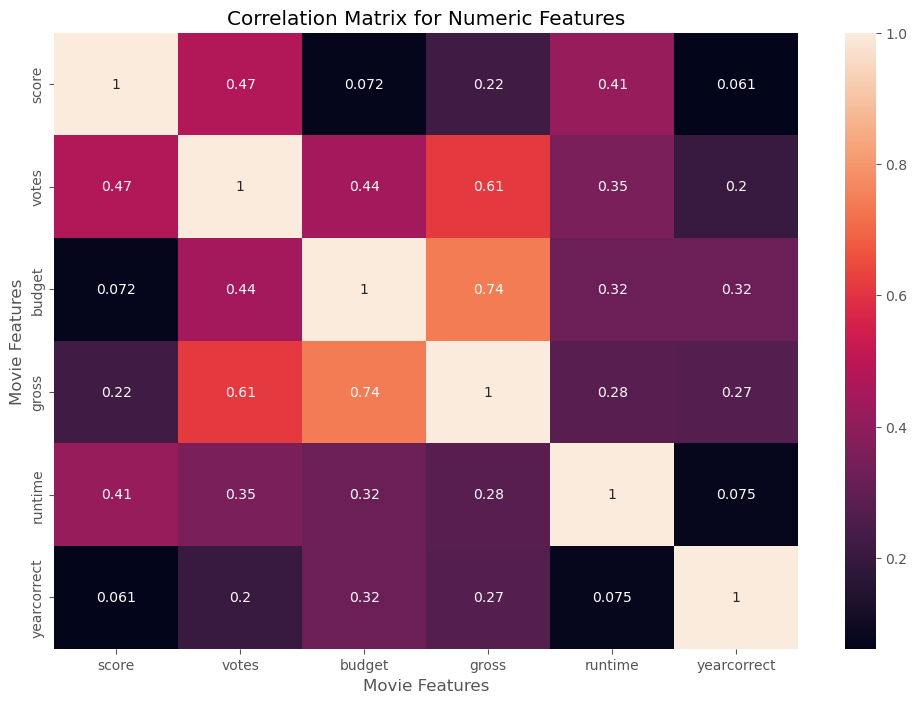

In [19]:
#Create a heatmap to look at correlation
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
#Change the non numeric values to categorical numeric values
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4679,6,6,8.4,927000,1791,2828,694,46,19000000,46998772,1420,146.0,1980
1,3917,6,1,5.8,65000,1574,1155,213,47,4500000,58853106,448,104.0,1980
2,3630,4,0,8.7,1200000,754,1815,1151,47,18000000,538375067,940,124.0,1980
3,204,4,4,7.7,221000,885,1410,1467,47,3500000,83453539,1103,88.0,1980
4,732,6,4,7.3,108000,716,349,270,47,6000000,39846344,1078,98.0,1980


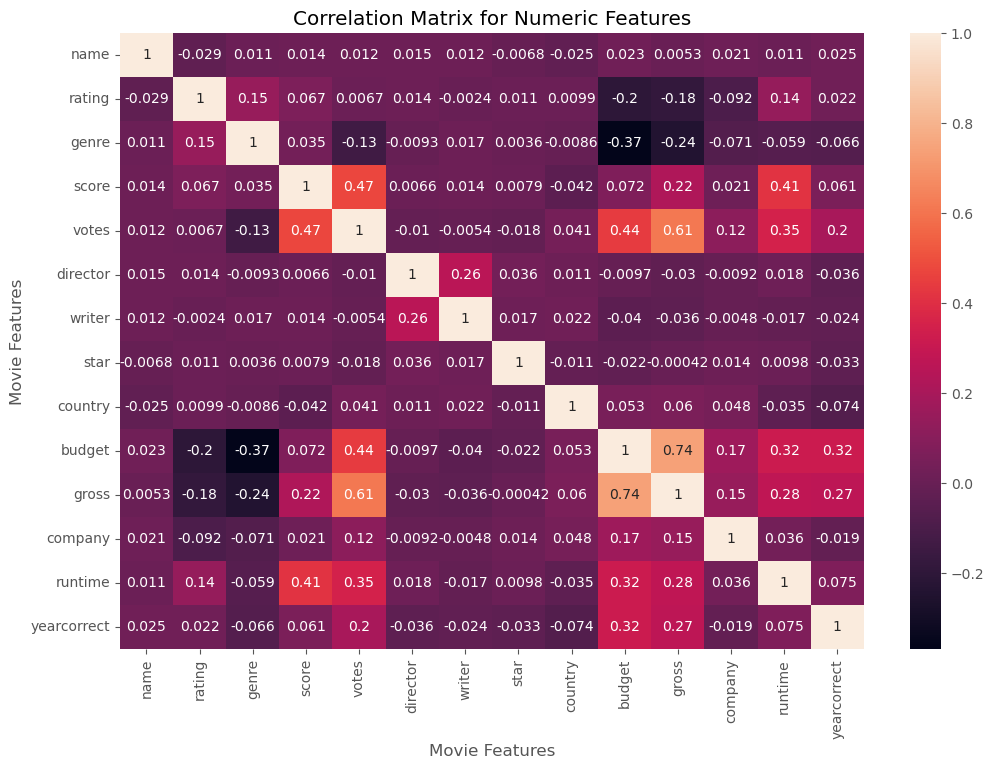

In [21]:
#Create a heatmap of all feeatures of the data
sns.heatmap(df_numerized.corr(), annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [22]:
df_numerized.corr().head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029220,0.010840,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,0.025485
rating,-0.029220,1.000000,0.148529,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,0.022089
genre,0.010840,0.148529,1.000000,0.035158,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148,-0.066049
score,0.013644,0.066535,0.035158,1.000000,0.474594,0.006557,0.014493,0.007886,-0.042119,0.071552,0.222504,0.020800,0.414501,0.061443
votes,0.012264,0.006652,-0.134986,0.474594,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263,0.202215


In [23]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.368226
budget  genre    -0.368226
genre   gross    -0.243547
gross   genre    -0.243547
budget  rating   -0.203553
dtype: float64

In [24]:
#Look at the higher pairwise correlation
high_corr = sorted_pairs[(sorted_pairs)>0.4]

high_corr

score        runtime        0.414501
runtime      score          0.414501
budget       votes          0.439077
votes        budget         0.439077
score        votes          0.474594
votes        score          0.474594
             gross          0.614432
gross        votes          0.614432
budget       gross          0.740028
gross        budget         0.740028
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64